# CAMB

### Importing relevant libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks')
sns.set_style('darkgrid')
from sympy import* 

### Importing CAMB

In [2]:
#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /home/bekithemba/.local/lib/python3.9/site-packages/camb-1.3.5-py3.9.egg/camb


### Accessing 7 years Binned WMAP Data and generating the plot 

<ipython-input-3-e84c626bc54a>:16: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1000)


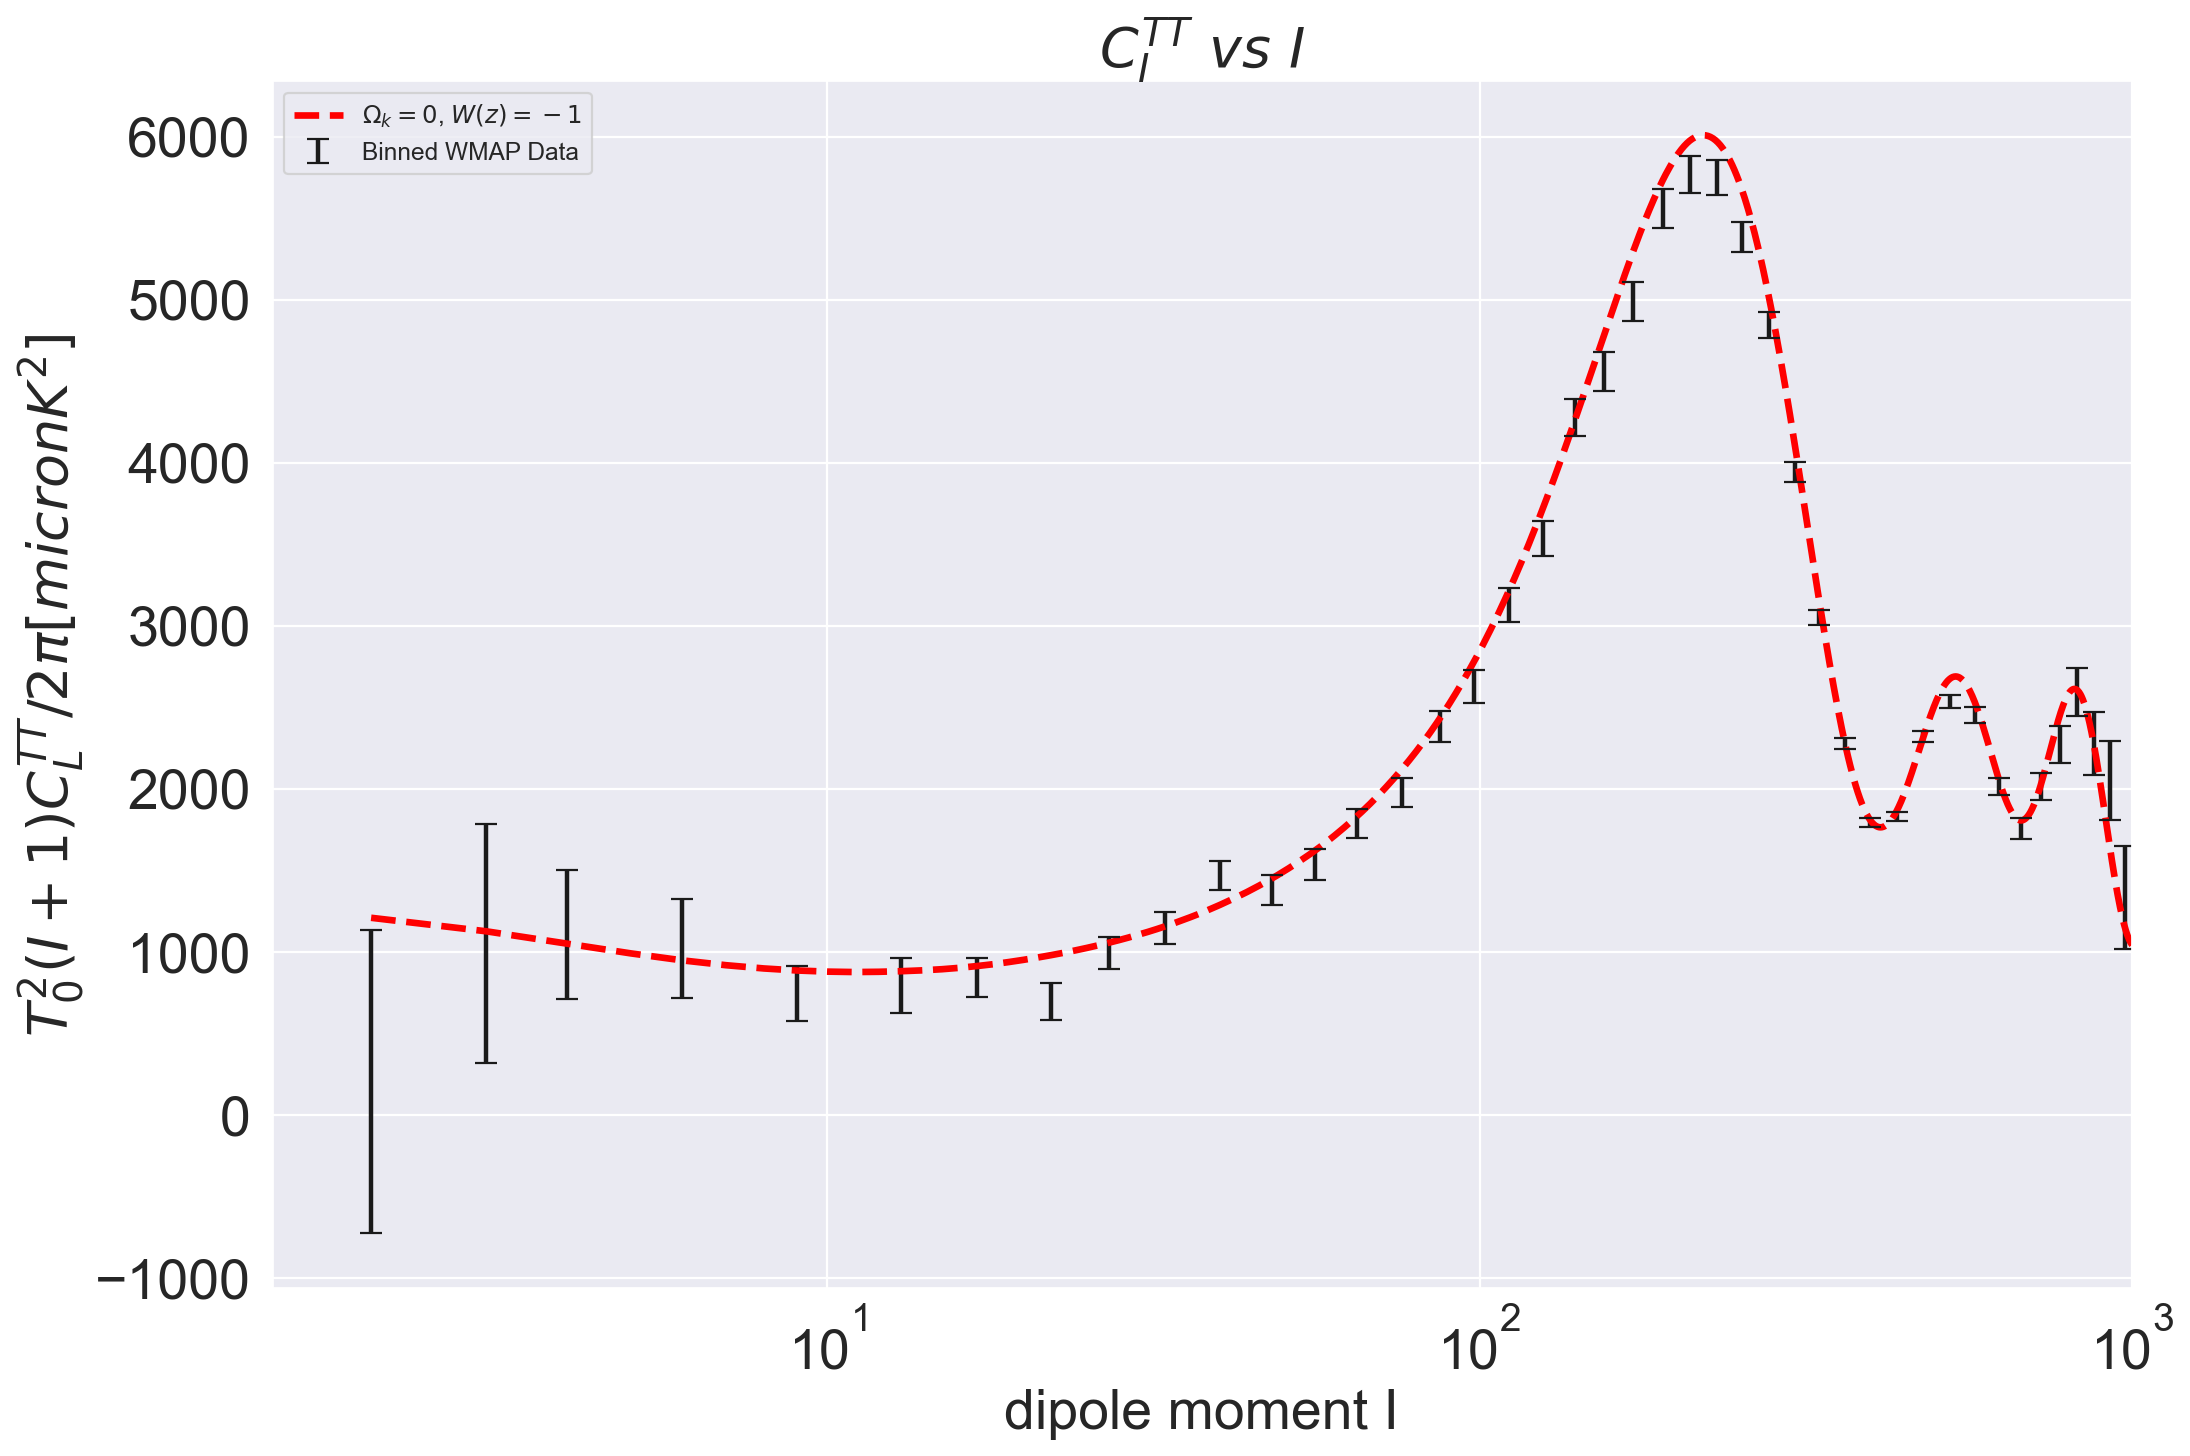

In [3]:
data= pd.read_csv("DATA1.csv")
Data = pd.read_csv('Data1.csv')

x=data['M1']
y=data['M4']
ebar=data['M5']

Z = Data["Unnamed: 0"]
W = Data['Column 1']

figure(figsize=(15, 10), dpi=80)
d=plt.plot(Z,W, color = 'red', lw = '3',ls='--')
a=plt.errorbar(x,y,ebar, 
            ecolor = 'k', elinewidth = 2,lw=3, capsize=5,ls='')
plt.xscale('log')
plt.xlim(0,1000)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('xlabel', fontsize=25)
plt.title('$C_{I}^{TT}~vs~I$',fontsize = 25)
plt.ylabel('$T_{0}^{2}(I+1)C_{L}^{TT}/2\pi[micronK^{2}]$',fontsize=25)
plt.xlabel('dipole moment I')
plt.legend(['$\Omega_k =0$, $W(z)=-1$', 'Binned WMAP Data'], loc ='upper left')

### Curvature $\Omega_k$

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2548, 4)
g : 0.1
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2536, 4)
b : 0.2
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2537, 4)
r : 0.30000000000000004
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2501, 4)
m : 0.4
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2542, 4)
orange : 0.5


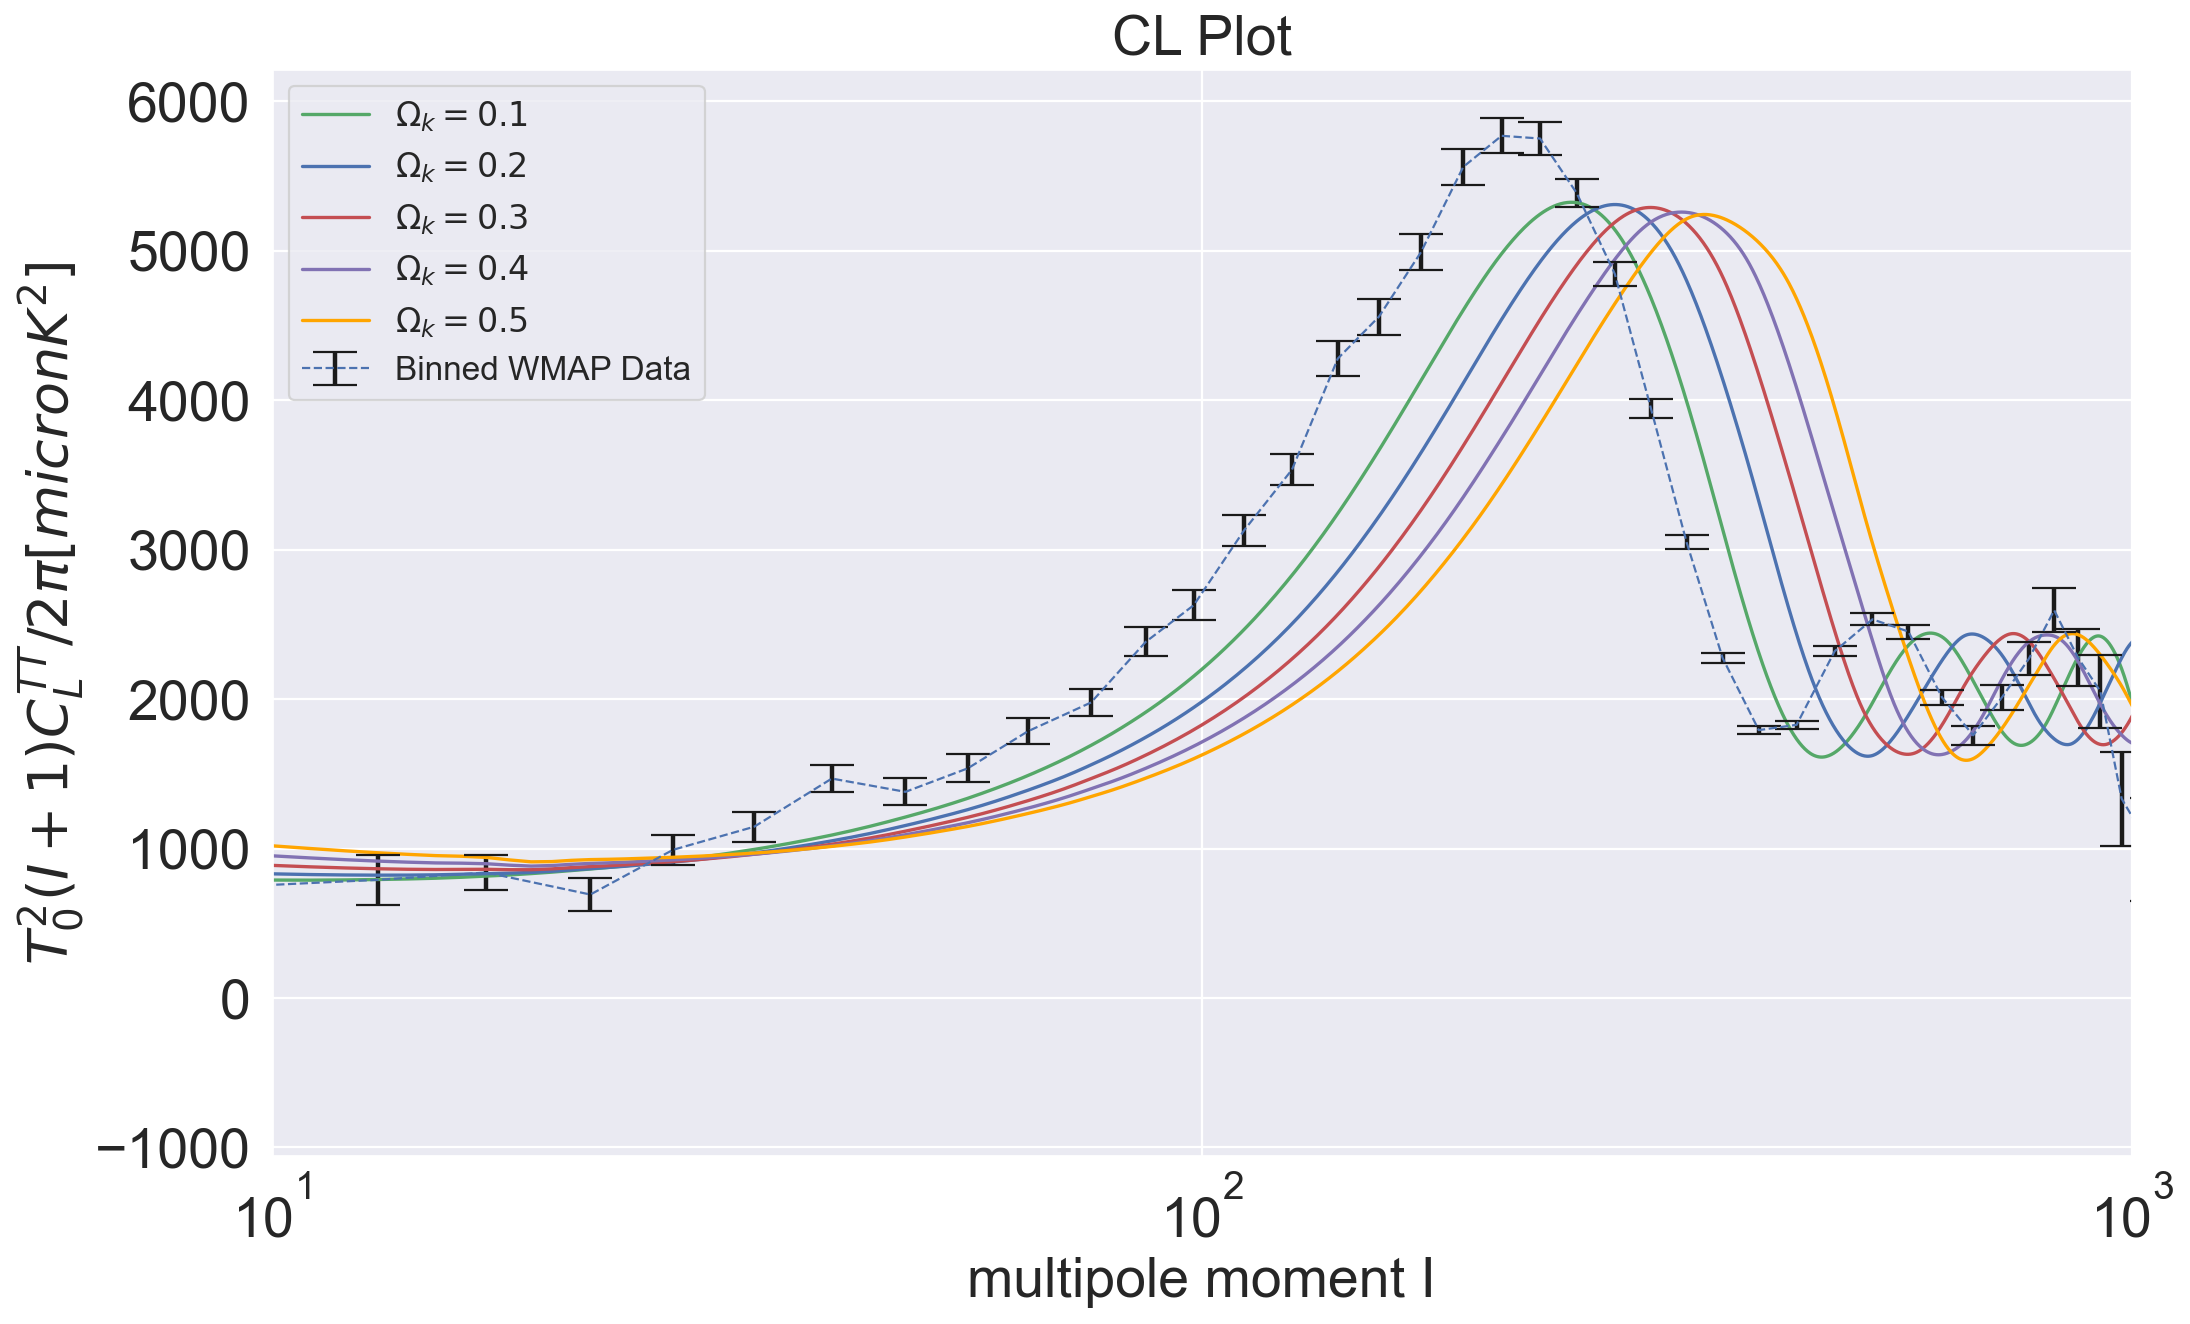

In [4]:

col = ['g', 'b', 'r', 'm', 'orange']
lu = 0

sw = np.linspace(0.1,0.5,5)
figure(figsize=(15, 9), dpi=80)
for omk in sw:
    #Set up a new set of parameters for CAMB
    pars = camb.CAMBparams()
    #This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=omk, tau=0.06)
    pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
    pars.set_for_lmax(2500, lens_potential_accuracy=0);


    #calculate results for these parameters
    results = camb.get_results(pars)

    #get dictionary of CAMB power spectra
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    for name in powers: print(name)
    
    #plot the total lensed CMB power spectra versus unlensed, and fractional difference
    totCL=powers['total']
    unlensedCL=powers['unlensed_scalar']
    print(totCL.shape)
    #Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
    #The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
    
    
    
    #figure(figsize=(15, 9), dpi=80)
    ls = np.arange(totCL.shape[0])
    plt.plot(ls,unlensedCL[:,0], color=col[lu])
    print(col[lu], ":", omk)
    lu +=1    

data= pd.read_csv("DATA1.csv");data.head()

x=data['M1']
y=data['M4']
ebar=data['M5']


x1=data['M2']
y1=data['M4']
ebar=data['M5']


x2=data['M3']
y2=data['M4']
ebar=data['M5']



plt.errorbar(x,y,ebar,
            ecolor = 'k', elinewidth = 2,lw=1, capsize=10,ls='--')
#plt.legend(['Dark '], loc ='upper right')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xscale('log')
plt.xlim(10,1000)
plt.title('CL Plot',fontsize = 25)
plt.xlabel('multipole moment I',fontsize=25)
plt.ylabel('$T_{0}^{2}(I+1)C_{L}^{TT}/2\pi[micronK^{2}]$',fontsize=25)
plt.legend(['$\Omega_k = 0.1$', '$\Omega_k = 0.2$','$\Omega_k = 0.3$','$\Omega_k = 0.4$','$\Omega_k = 0.5$','Binned WMAP Data'],fontsize= 15, loc ='upper left')
plt.show()


total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2520, 4)
g : -0.2
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2539, 4)
b : -0.18
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2530, 4)
r : -0.16
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2520, 4)
m : -0.14
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2529, 4)
orange : -0.12


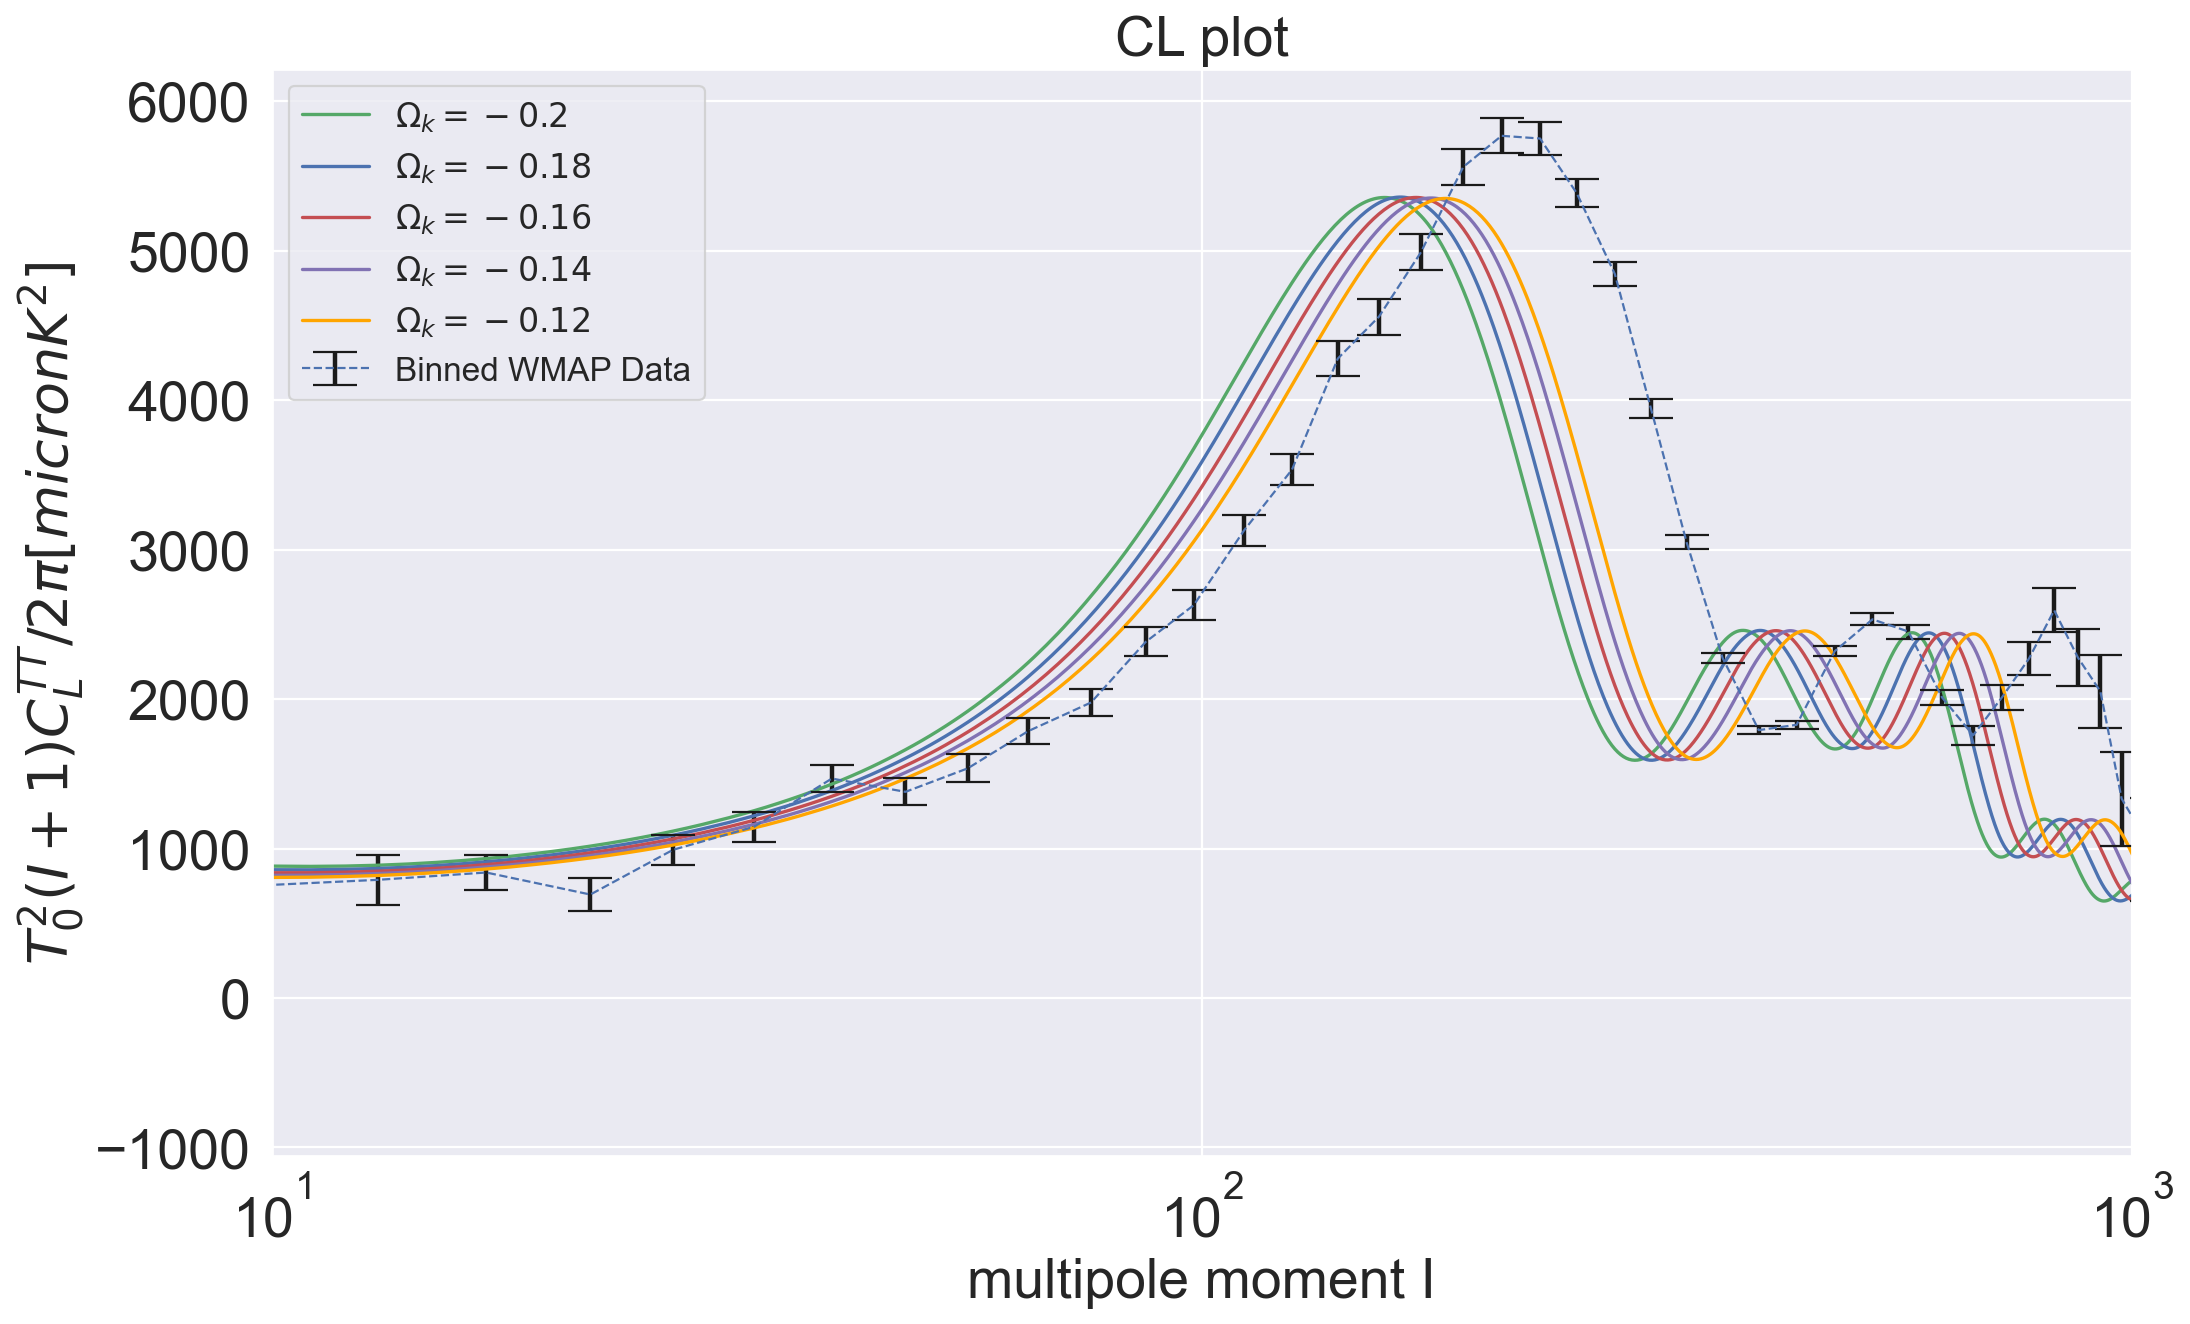

In [8]:

col = ['g', 'b', 'r', 'm', 'orange']
lu = 0

sw = np.linspace(-0.2,-0.12,5)
figure(figsize=(15, 9), dpi=80)
for omk in sw:
    #Set up a new set of parameters for CAMB
    pars = camb.CAMBparams()
    #This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=omk, tau=0.06)
    pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
    pars.set_for_lmax(2500, lens_potential_accuracy=0);


    #calculate results for these parameters
    results = camb.get_results(pars)

    #get dictionary of CAMB power spectra
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    for name in powers: print(name)
    
    #plot the total lensed CMB power spectra versus unlensed, and fractional difference
    totCL=powers['total']
    unlensedCL=powers['unlensed_scalar']
    print(totCL.shape)
    #Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
    #The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
    
    
    
    #figure(figsize=(15, 9), dpi=80)
    ls = np.arange(totCL.shape[0])
    plt.plot(ls,unlensedCL[:,0], color=col[lu])
    print(col[lu], ":", omk)
    lu +=1    

data= pd.read_csv("DATA1.csv");data.head()

x=data['M1']
y=data['M4']
ebar=data['M5']


x1=data['M2']
y1=data['M4']
ebar=data['M5']


x2=data['M3']
y2=data['M4']
ebar=data['M5']



plt.errorbar(x,y,ebar,
            ecolor = 'k', elinewidth = 2,lw=1, capsize=10,ls='--')
#plt.legend(['Dark '], loc ='upper right')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xscale('log')
plt.xlim(10,1000)
plt.title('CL plot',fontsize = 25)
plt.xlabel('multipole moment I',fontsize=25)
plt.ylabel('$T_{0}^{2}(I+1)C_{L}^{TT}/2\pi[micronK^{2}]$',fontsize=25)
plt.legend(['$\Omega_k = -0.2$', '$\Omega_k = -0.18$','$\Omega_k = -0.16$','$\Omega_k = -0.14$','$\Omega_k = -0.12$','Binned WMAP Data'],fontsize= 15, loc ='upper left')
plt.show()


### Equation of state $w(z)$

(2051, 4)
g : -2.0
(2051, 4)
b : -1.8
(2051, 4)
r : -1.6
(2051, 4)
m : -1.4
(2051, 4)
orange : -1.2
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2051, 4)


<ipython-input-6-73974ee86717>:91: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1000)


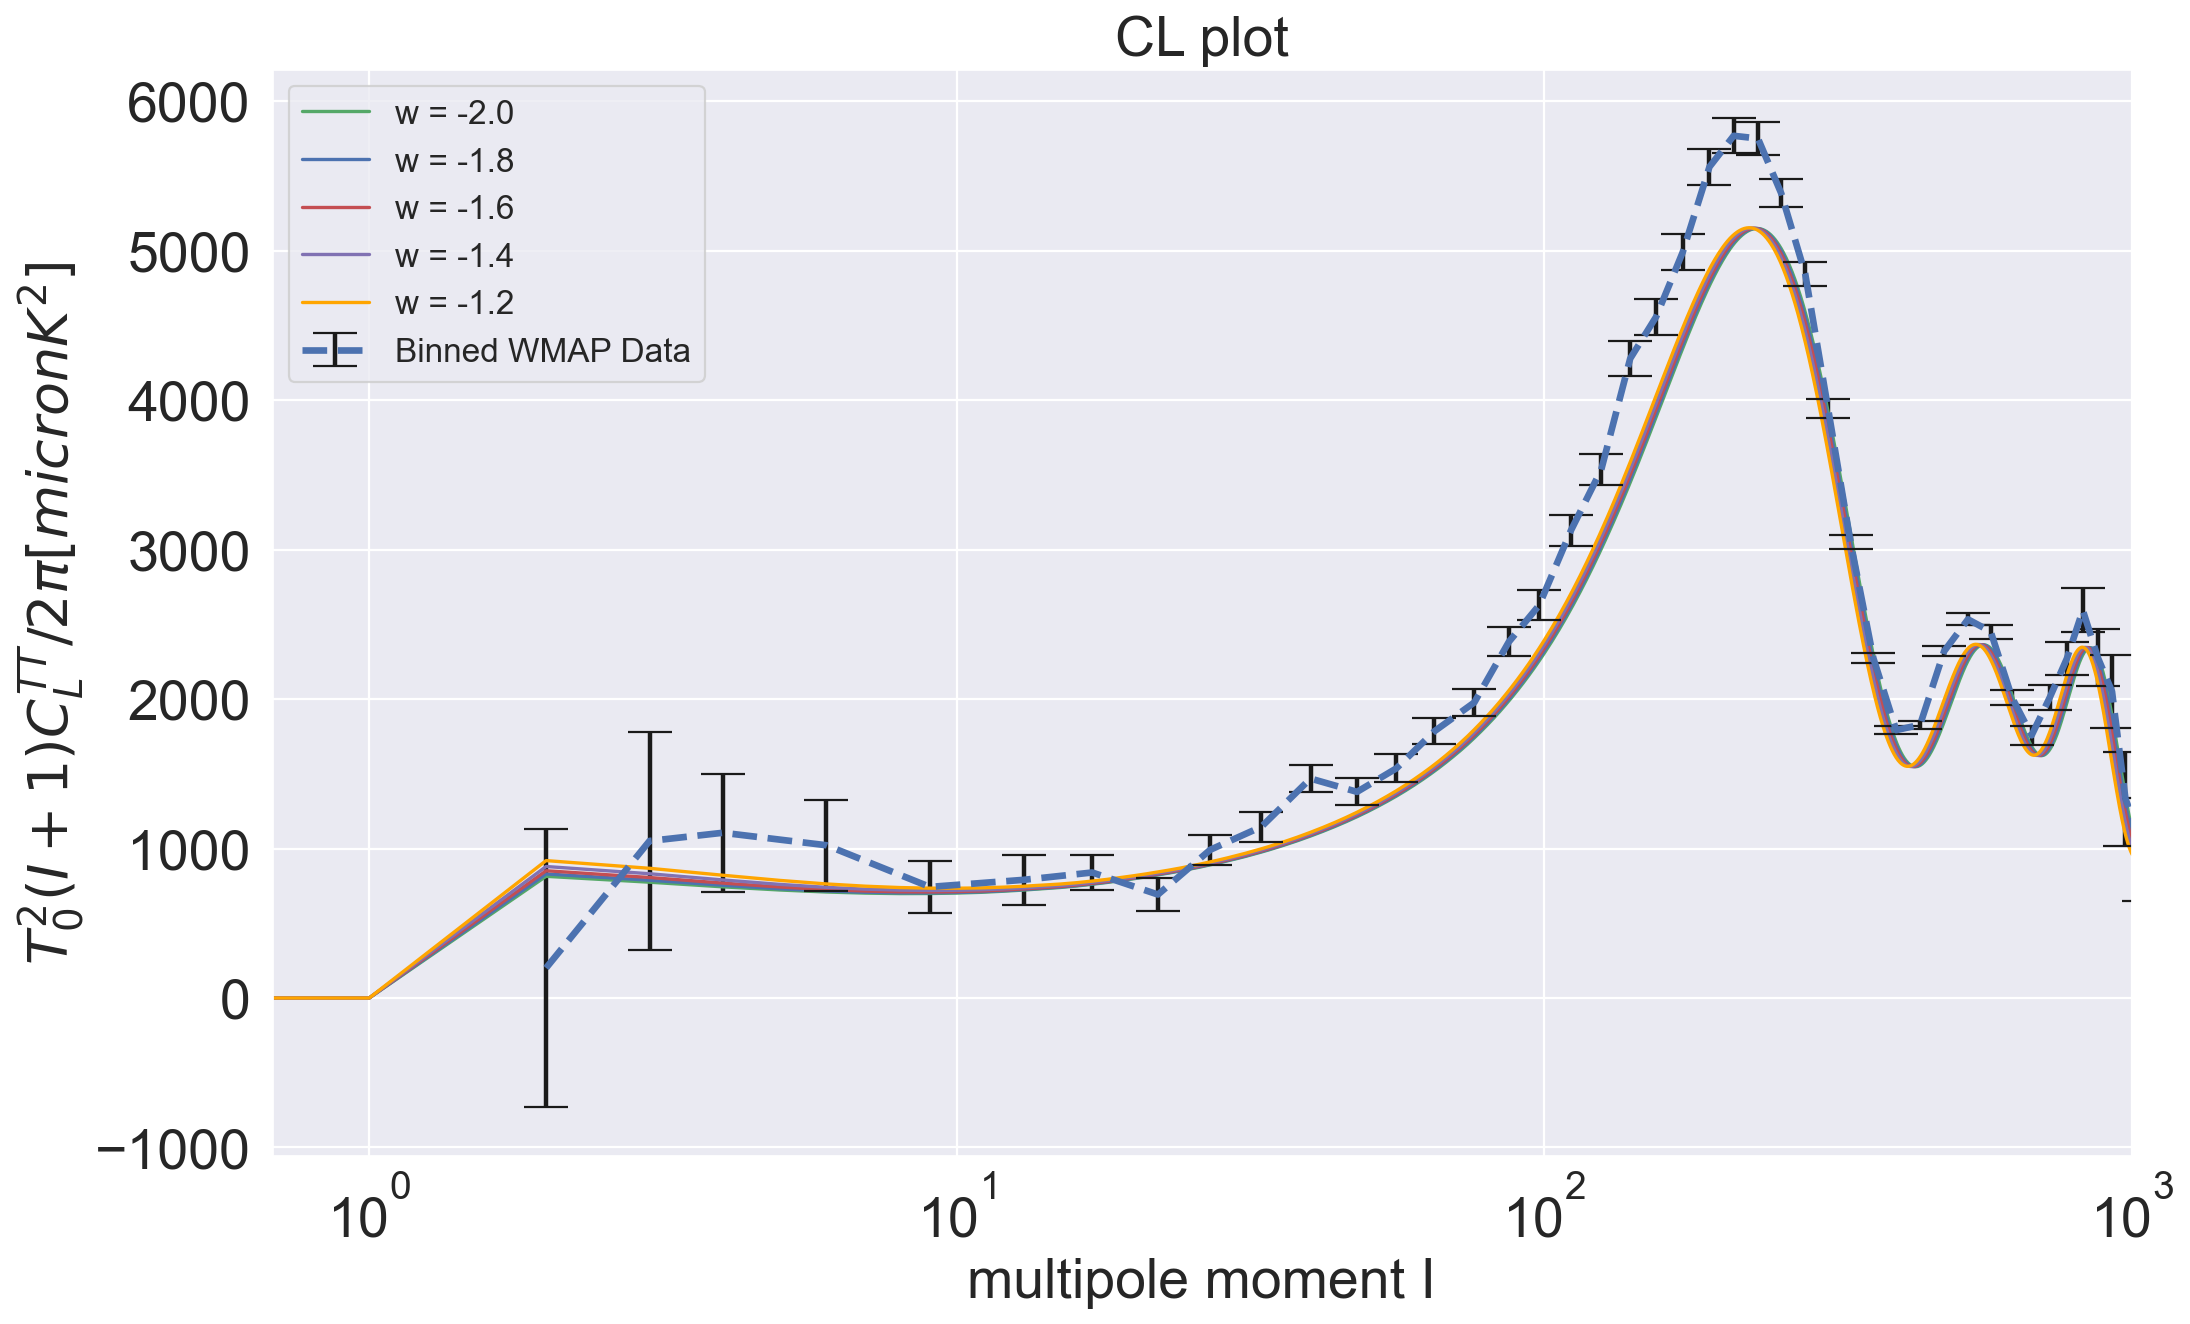

In [6]:

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

col = ['g', 'b', 'r', 'm', 'orange', 'purple', 'maroon', 'cyan', ]
lu = 0

ws = np.linspace(-2.0, -1.2, 5)
figure(figsize=(15, 9), dpi=80)
for w in ws:
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
    pars.InitPower.set_params(As=2e-9, ns=0.965)
    pars.set_for_lmax(2000, lens_potential_accuracy=1)
    pars.set_dark_energy(w=w, wa=0, dark_energy_model='fluid')
    #calculate results for these parameters
    results = camb.get_results(pars)

    #get dictionary of CAMB power spectra
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    #for name in powers: print(name)

    #plot the total lensed CMB power spectra versus unlensed, and fractional difference
    totCL=powers['total']
    unlensedCL=powers['unlensed_scalar']
    print(totCL.shape)
    #Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
    #The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
    
    
    
#     figure(figsize=(15, 9), dpi=80)
    ls = np.arange(totCL.shape[0])
    #ax = plt.plot(ls,totCL[:,0], color='k')
    plt.plot(ls,unlensedCL[:,0], color=col[lu])
    #hold(True)
    print(col[lu], ":", w)
    lu +=1


# plt.show()

Data = pd.read_csv('Data1.csv')
Z = Data["Unnamed: 0"]
W = Data['Column 1']


data= pd.read_csv("DATA1.csv");data.head()

x=data['M1']
y=data['M4']
ebar=data['M5']


x1=data['M2']
y1=data['M4']
ebar=data['M5']


x2=data['M3']
y2=data['M4']
ebar=data['M5']

#calculate results for these parameters
results = camb.get_results(pars)




#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).

plt.errorbar(x,y,ebar,
            ecolor = 'k', elinewidth = 2,lw=3, capsize=10, ls='--')
plt.legend(['Dark '], loc ='upper right')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xscale('log')
plt.xlim(0,1000)
plt.title('CL plot',fontsize=25)
plt.xlabel('multipole moment I',fontsize=25)
plt.ylabel('$T_{0}^{2}(I+1)C_{L}^{TT}/2\pi[micronK^{2}]$',fontsize = 25)
plt.legend(['w = -2.0', 'w = -1.8','w = -1.6','w = -1.4','w = -1.2','Binned WMAP Data'], loc ='upper left',fontsize = 15)
plt.show()

(2051, 4)
g : 0.1
(2051, 4)
b : 0.2
(2051, 4)
r : 0.30000000000000004
(2051, 4)
m : 0.4
(2051, 4)
orange : 0.5
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2051, 4)


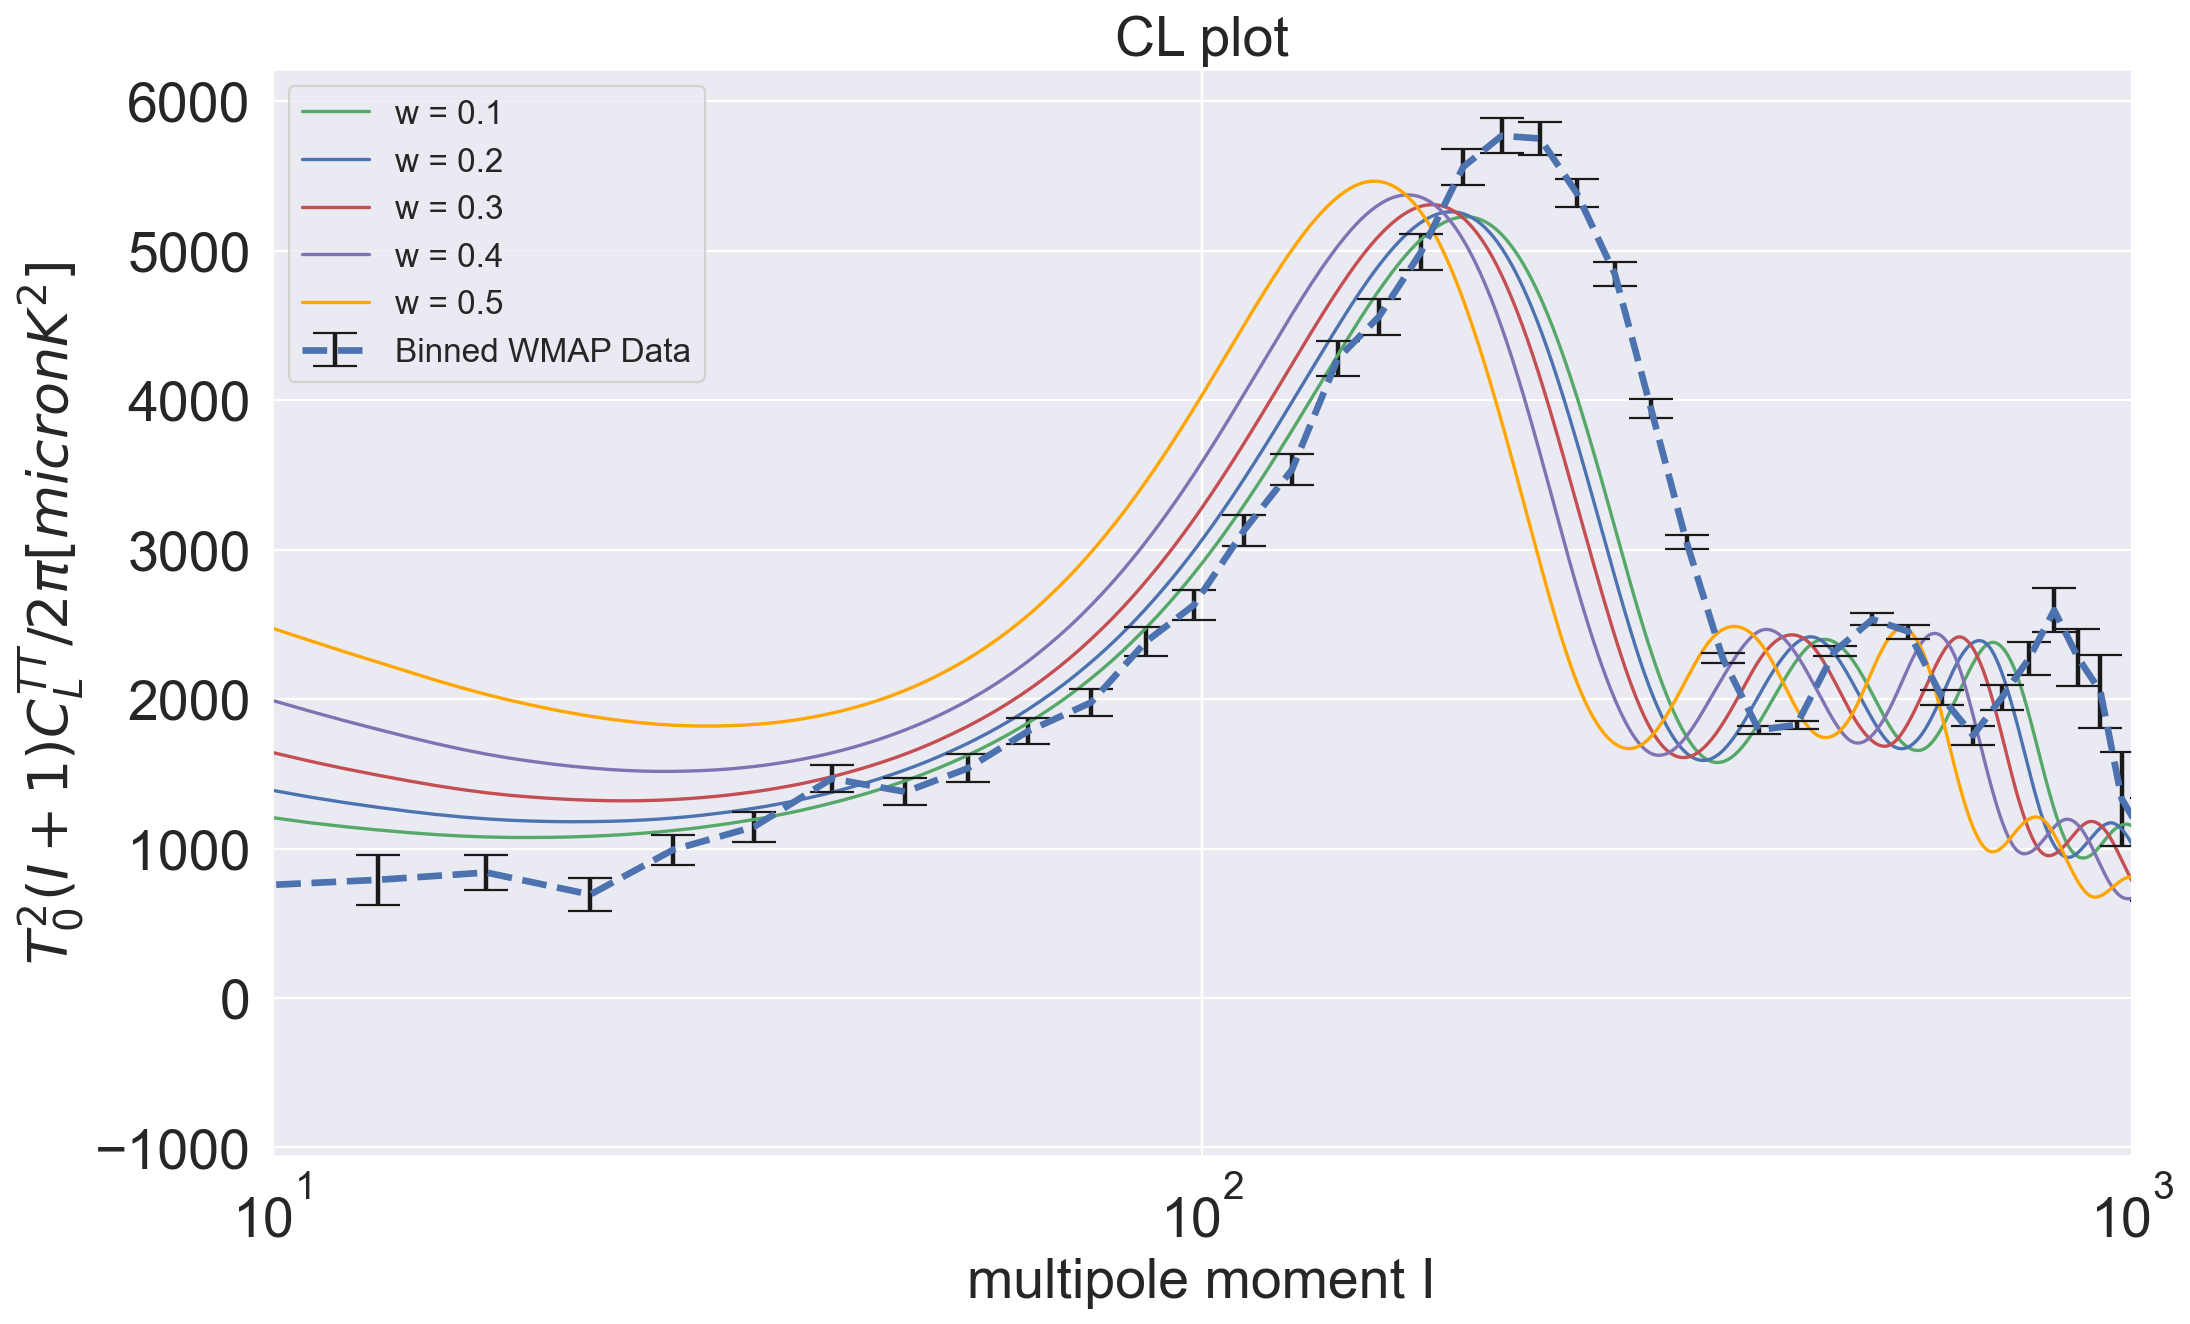

In [7]:

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

col = ['g', 'b', 'r', 'm', 'orange', 'purple', 'maroon', 'cyan', ]
lu = 0

ws = np.linspace(0.1, 0.5, 5)
figure(figsize=(15, 9), dpi=80)
for w in ws:
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
    pars.InitPower.set_params(As=2e-9, ns=0.965)
    pars.set_for_lmax(2000, lens_potential_accuracy=1)
    pars.set_dark_energy(w=w, wa=-1, dark_energy_model='fluid')
    #calculate results for these parameters
    results = camb.get_results(pars)

    #get dictionary of CAMB power spectra
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    #for name in powers: print(name)

    #plot the total lensed CMB power spectra versus unlensed, and fractional difference
    totCL=powers['total']
    unlensedCL=powers['unlensed_scalar']
    print(totCL.shape)
    #Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
    #The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
    
    
    
#     figure(figsize=(15, 9), dpi=80)
    ls = np.arange(totCL.shape[0])
    #ax = plt.plot(ls,totCL[:,0], color='k')
    plt.plot(ls,unlensedCL[:,0], color=col[lu])
    #hold(True)
    print(col[lu], ":", w)
    lu +=1


# plt.show()

Data = pd.read_csv('Data1.csv')
Z = Data["Unnamed: 0"]
W = Data['Column 1']


data= pd.read_csv("DATA1.csv");data.head()

x=data['M1']
y=data['M4']
ebar=data['M5']


x1=data['M2']
y1=data['M4']
ebar=data['M5']


x2=data['M3']
y2=data['M4']
ebar=data['M5']

#calculate results for these parameters
results = camb.get_results(pars)




#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).

plt.errorbar(x,y,ebar,
            ecolor = 'k', elinewidth = 2,lw=3, capsize=10, ls='--')
plt.legend(['Dark '], loc ='upper right')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xscale('log')
plt.xlim(10,1000)
plt.title('CL plot',fontsize=25)
plt.xlabel('multipole moment I',fontsize=25)
plt.ylabel('$T_{0}^{2}(I+1)C_{L}^{TT}/2\pi[micronK^{2}]$',fontsize = 25)
plt.legend(['w = 0.1', 'w = 0.2','w = 0.3','w = 0.4','w = 0.5','Binned WMAP Data'], loc ='upper left',fontsize = 15)
plt.show()